## Install Packages

In [1]:
#install packages
import idaes
import pyomo.environ as pyo
import numpy as np
import math
import time
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sympy import symbols, Eq, solve
from membrane_reactor_v2 import create_model
from membrane_reactor_v2 import toggle_reaction_off
from membrane_reactor_v2 import toggle_reaction_on
from membrane_reactor_v2 import init_reaction_rate
from membrane_reactor_v2 import pressure_sensitivity
from membrane_reactor_v2 import _hydrogen_per_feed, _pascal_to_psig
from membrane_reactor_v2 import sweepflow_sensitivity
from membrane_reactor_v2 import plot_pd

## Datasets

In [2]:
# Specify case based on input dataset.
# # PCI-10: bench-scale laboratory  data supplied by PCI - 
# # PCI-H2A: bench-scale laboratory data on membrane performance combined with industrial gas properties from the NREL H2A model report - 
# #            corresponds to dataset in Table 3 in paper
# # public: data published in Brunetti 2007 https://doi.org/10.1016/j.memsci.2007.09.009
# # public-H2A: membrane perfromance data from Brunetti 2007 combined with industrial gas properties from the NREL H2A model report

case = 'PCI-H2A'

# save figures/data?
savefig = False
save_data=False

# print?
LOUD = True

In [3]:
# read data from json file
data_path = 'WGSMR_data_{}'.format(case)
with open(data_path, 'r') as source_file:
    data = json.load(source_file)

## Sweep flow sensitivity - differrent temperatures - DELETE SUBSECTION

In [4]:
sweep_sensitivity_study = True

In [5]:
feed_pressure_ss = _pascal_to_psig(data['feed_pressure'])
print(feed_pressure_ss)

385.32 pound_force_per_square_inch


In [6]:
if sweep_sensitivity_study:
    conv_sweep, rec_sweep = sweepflow_sensitivity(data,
                                                    sweep_list=np.linspace(0,0.5,20),
                                                           temp_list=[624,674,724,774,824],
                                                           feed_pressure=feed_pressure_ss.magnitude,
                                                           industry_units=False,
                                                           LOUD=LOUD,
                                                           save_data=save_data)

P = 2758000.00 pascal Pa
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
       

   3 -3.0036473e-01 6.13e-07 1.93e+04  -1.0 6.00e-03    -  9.90e-01 9.90e-01h  1
   4 -3.0029059e-01 8.77e-08 9.73e+03  -1.0 3.22e-03    -  1.00e+00 9.93e-01h  1
   5 -3.0025722e-01 1.84e-08 7.94e+03  -1.0 1.48e-03    -  1.00e+00 1.00e+00h  1
   6 -3.0024259e-01 4.07e-09 1.86e+03  -3.8 6.36e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:  -3.0024258883576826e-01   -3.0024258883576826e-01
Dual infeasibility......:   2.3123902792576700e-10    2.3123902792576700e-10
Constraint violation....:   4.0719276238558708e-09    4.0719276238558708e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.0719276238558708e-09    4.0719276238558708e-09


Number of objective function evaluations             = 7
Number of objective gradient evaluations             = 7
Number of equality constraint evaluations            = 7
Number of inequal

Sweep/feed ratio = 0.02631578947368421 T = 624
total sweep = 3.631215789473684e-05

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 3.631215789473684e-05
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

Sweep/feed ratio = 0.07894736842105263 T = 624
total sweep = 0.00010893647368421051

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00010893647368421051
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.4035313e-01 3.31e+01 1.00e+03  -0.5 0.00e+00    -  0.00e+00 0.00e+00R  1
  11r-4.3894950e-01 3.05e+01 2.08e+03  -0.5 3.08e+02    -  2.36e-02 9.90e-04f  1
  12r-4.3539241e-01 1.32e+01 2.60e+03  -0.5 3.40e+00    -  3.09e-02 2.26e-02f  1
  13r-4.3882439e-01 7.30e+00 3.69e+03  -0.5 1.00e+00    -  7.78e-02 4.26e-02f  1
  14r-4.4307534e-01 3.20e+00 3.01e+03  -0.5 7.43e-01    -  9.36e-02 8.74e-02f  1
  15r-4.4558283e-01 1.73e+00 3.70e+03  -0.5 1.17e-01    -  2.37e-01 9.45e-02f  1
  16r-4.4765848e-01 1.29e+00 2.04e+03  -0.5 9.78e-02    -  3.89e-01 2.06e-01f  1
  17r-4.4831909e-01 1.10e+00 1.46e+03  -0.5 1.53e-01    -  4.70e-01 1.40e-01f  1
  18r-4.4904825e-01 9.59e-01 1.23e+03  -0.5 1.79e-01    -  2.50e-01 1.24e-01f  1
  19r-4.5155896e-01 5.47e-01 1.13e+03  -0.5 8.28e-02    -  1.52e-01 4.16e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20r-4.5301506e-01 3.65e-01

Sweep/feed ratio = 0.15789473684210525 T = 624
total sweep = 0.00021787294736842102

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00021787294736842102
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

   3 -4.4046908e-01 3.92e+01 2.96e+03  -1.0 1.26e-02    -  9.90e-01 6.38e-01h  1
   4 -4.4039226e-01 3.51e+01 1.80e+04  -1.0 5.33e-03    -  1.00e+00 1.03e-01h  1
   5 -4.4039130e-01 3.51e+01 1.57e+07  -1.0 4.81e-03    -  1.00e+00 1.43e-03h  1
   6 -4.4039129e-01 3.51e+01 1.09e+12  -1.0 4.80e-03    -  1.00e+00 1.43e-05h  1
   7 -4.4039093e-01 3.50e+01 3.99e+14  -1.0 4.92e-03    -  1.98e-01 5.33e-04h  1
   8 -4.4039052e-01 3.50e+01 3.99e+14  -1.0 9.88e+03    -  7.71e-04 7.71e-04s 12
   9 -4.4039052e-01 3.50e+01 3.28e+12  -1.0 7.02e-09  18.0 9.92e-01 9.92e-01s 12
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 -4.4039052e-01 3.50e+01 7.15e+09  -1.0 2.15e-08  17.5 1.00e+00 1.00e+00s 12
  11r-4.4039052e-01 3.50e+01 1.00e+03   0.6 0.00e+00  17.0 0.00e+00 0.00e+00R  1
  12r-4.4075477e-01 3.47e+01 3.96e+03   0.6 7.06e+03    -  4.02e-02 9.91e-04f  1
  13r-4.5403635e-01 2.59e+01 2.62e+03   0.6 1.42e+01    -  3.76e-02 4.12e-02f  1
  14r-4.9129799e-01 8.53e+00

Sweep/feed ratio = 0.23684210526315788 T = 624
total sweep = 0.00032680942105263157

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00032680942105263157
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

   9r-4.4041634e-01 3.63e+01 1.00e+03  -1.0 0.00e+00    -  0.00e+00 4.82e-07R  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.3421227e-01 2.15e+01 1.17e+03  -1.0 3.12e+01    -  1.09e-02 2.02e-03f  1
  11r-4.3443572e-01 1.13e+01 1.47e+03  -1.0 3.45e+00    -  2.47e-02 8.33e-03f  1
  12r-4.3635123e-01 6.00e+00 2.49e+03  -1.0 1.67e+00    -  4.98e-02 2.28e-02f  1
  13r-4.3873868e-01 3.01e+00 3.76e+03  -1.0 1.15e+00    -  9.51e-02 5.04e-02f  1
  14r-4.4092280e-01 1.89e+00 2.83e+03  -1.0 9.03e-02    -  6.14e-02 9.37e-02f  1
  15r-4.4189967e-01 1.50e+00 2.48e+03  -1.0 2.56e-02    -  2.12e-01 1.26e-01f  1
  16r-4.4197984e-01 1.38e+00 2.16e+03  -1.0 6.50e-02    -  1.60e-01 8.11e-02f  1
  17r-4.4204113e-01 1.26e+00 1.95e+03  -1.0 5.53e-02    -  9.22e-02 9.22e-02f  1
  18r-4.4213028e-01 1.08e+00 1.38e+03  -1.0 2.27e-02    -  4.67e-01 1.45e-01f  1
  19r-4.4293669e-01 5.78e-01 1.02e+03  -1.0 1.92e-02    -  3.61e-01 4.67e-01f  1
iter    objective    inf_pr 

Sweep/feed ratio = 0.3157894736842105 T = 624
total sweep = 0.00043574589473684204

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00043574589473684204
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wi

   6r-4.4046022e-01 3.85e+01 1.00e+03  -1.0 0.00e+00    -  0.00e+00 2.59e-07R  6
   7r-4.3457707e-01 2.39e+01 1.04e+03  -1.0 3.11e+01    -  1.03e-02 1.89e-03f  1
   8r-4.3488221e-01 1.33e+01 1.82e+03  -1.0 4.83e+00    -  2.20e-02 7.63e-03f  1
   9r-4.3681720e-01 7.31e+00 3.02e+03  -1.0 1.38e+00    -  4.52e-02 2.16e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.3795695e-01 4.25e+00 4.80e+03  -1.0 1.72e+00    -  8.00e-02 3.87e-02f  1
  11r-4.4086493e-01 1.79e+00 3.00e+03  -1.0 1.75e-01    -  3.94e-02 9.33e-02f  1
  12r-4.4163229e-01 1.45e+00 2.90e+03  -1.0 2.73e-02    -  1.82e-01 7.09e-02f  1
  13r-4.4185954e-01 1.32e+00 2.56e+03  -1.0 5.18e-02    -  2.29e-01 8.30e-02f  1
  14r-4.4194390e-01 1.22e+00 2.33e+03  -1.0 6.36e-02    -  9.90e-02 7.78e-02f  1
  15r-4.4203001e-01 1.10e+00 2.09e+03  -1.0 3.81e-02    -  1.06e-01 9.97e-02f  1
  16r-4.4217990e-01 8.76e-01 1.26e+03  -1.0 1.07e-02    -  5.19e-01 2.00e-01f  1
  17r-4.4296932e-01 5.20e-01

Sweep/feed ratio = 0.39473684210526316 T = 624
total sweep = 0.0005446823684210526

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0005446823684210526
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

   6r-4.4045329e-01 3.82e+01 1.00e+03  -1.0 0.00e+00    -  0.00e+00 2.75e-07R  6
   7r-4.3468759e-01 2.40e+01 1.14e+03  -1.0 3.10e+01    -  1.04e-02 1.90e-03f  1
   8r-4.3492494e-01 1.30e+01 1.84e+03  -1.0 4.69e+00    -  2.24e-02 7.72e-03f  1
   9r-4.3667342e-01 7.02e+00 2.93e+03  -1.0 1.41e+00    -  4.32e-02 2.15e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.3784719e-01 4.16e+00 4.40e+03  -1.0 1.71e+00    -  7.30e-02 3.79e-02f  1
  11r-4.4045181e-01 2.04e+00 3.10e+03  -1.0 1.84e-01    -  5.51e-02 8.06e-02f  1
  12r-4.4129958e-01 1.49e+00 3.57e+03  -1.0 4.02e-02    -  2.11e-01 7.15e-02f  1
  13r-4.4154680e-01 1.37e+00 3.06e+03  -1.0 5.65e-02    -  1.65e-01 7.36e-02f  1
  14r-4.4169568e-01 1.25e+00 2.82e+03  -1.0 5.11e-02    -  7.78e-02 7.85e-02f  1
  15r-4.4186170e-01 1.10e+00 2.14e+03  -1.0 2.35e-02    -  2.52e-01 1.16e-01f  1
  16r-4.4248722e-01 5.14e-01 8.98e+02  -1.0 9.55e-03    -  5.38e-01 5.27e-01f  1
  17r-4.4368588e-01 1.36e-01

Sweep/feed ratio = 0.47368421052631576 T = 624
total sweep = 0.0006536188421052631

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0006536188421052631
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

   6r-4.4048631e-01 3.98e+01 1.00e+03  -1.0 0.00e+00    -  0.00e+00 4.36e-07R  5
   7r-4.3475132e-01 2.47e+01 1.04e+03  -1.0 3.23e+01    -  1.01e-02 1.83e-03f  1
   8r-4.3494430e-01 1.38e+01 1.86e+03  -1.0 5.26e+00    -  2.27e-02 7.50e-03f  1
   9r-4.3660896e-01 7.91e+00 2.98e+03  -1.0 1.30e+00    -  4.29e-02 2.09e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.3759126e-01 4.60e+00 4.47e+03  -1.0 1.87e+00    -  7.39e-02 3.81e-02f  1
  11r-4.4019070e-01 2.29e+00 3.15e+03  -1.0 2.24e-01    -  4.68e-02 7.74e-02f  1
  12r-4.4116601e-01 1.70e+00 3.94e+03  -1.0 4.69e-02    -  2.20e-01 6.83e-02f  1
  13r-4.4146112e-01 1.57e+00 3.53e+03  -1.0 5.51e-02    -  1.16e-01 6.88e-02f  1
  14r-4.4168020e-01 1.43e+00 3.23e+03  -1.0 4.07e-02    -  8.22e-02 8.02e-02f  1
  15r-4.4194384e-01 1.22e+00 1.95e+03  -1.0 1.28e-02    -  4.76e-01 1.35e-01f  1
  16r-4.4287686e-01 7.10e-01 1.13e+03  -1.0 1.04e-02    -  4.06e-01 4.16e-01f  1
  17r-4.4418041e-01 2.31e-01

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

Sweep/feed ratio = 0.02631578947368421 T = 674
total sweep = 3.631215789473684e-05

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 3.631215789473684e-05
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

Sweep/feed ratio = 0.07894736842105263 T = 674
total sweep = 0.00010893647368421051

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00010893647368421051
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

   7r-4.3993312e-01 3.97e+00 1.00e+03  -1.0 0.00e+00    -  0.00e+00 2.74e-07R  5
   8r-4.3728079e-01 2.75e+00 2.16e+03  -1.0 3.43e+00    -  2.63e-02 5.52e-03f  1
   9r-4.3851367e-01 1.48e+00 3.22e+03  -1.0 4.51e-01    -  4.33e-02 2.20e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.3999520e-01 7.86e-01 3.12e+03  -1.0 2.93e-01    -  4.25e-02 4.06e-02f  1
  11r-4.4067410e-01 2.40e-01 2.64e+03  -1.0 1.51e-01    -  3.21e-02 4.36e-02f  1
  12r-4.4127765e-01 3.75e-02 5.37e+03  -1.0 9.13e-02    -  3.28e-01 6.57e-02f  1
  13r-4.4189066e-01 2.39e-02 3.42e+03  -1.0 3.02e-02    -  2.01e-01 3.95e-01f  1
  14r-4.4165107e-01 1.16e-02 2.10e+03  -1.0 9.01e-03    -  4.72e-01 5.51e-01f  1
  15r-4.4179980e-01 9.55e-03 9.15e+02  -1.0 3.19e-02    -  4.25e-01 1.77e-01f  1
  16r-4.4199028e-01 7.96e-03 1.12e+03  -1.0 3.96e-02    -  2.64e-01 1.57e-01f  1
  17r-4.4224666e-01 6.38e-03 9.96e+02  -1.0 3.38e-02    -  2.12e-01 1.81e-01f  1
  18r-4.4269063e-01 4.24e-03

Sweep/feed ratio = 0.15789473684210525 T = 674
total sweep = 0.00021787294736842102

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00021787294736842102
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

   7r-4.3994239e-01 4.13e+00 1.00e+03  -1.0 0.00e+00    -  0.00e+00 3.64e-07R  4
   8r-4.3734717e-01 2.87e+00 2.18e+03  -1.0 3.78e+00    -  2.61e-02 5.32e-03f  1
   9r-4.3829492e-01 1.62e+00 3.41e+03  -1.0 4.59e-01    -  4.42e-02 2.02e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.3962992e-01 8.92e-01 3.33e+03  -1.0 3.01e-01    -  4.18e-02 3.94e-02f  1
  11r-4.4032923e-01 3.10e-01 2.61e+03  -1.0 1.69e-01    -  2.17e-02 4.47e-02f  1
  12r-4.4091724e-01 4.87e-02 5.01e+03  -1.0 1.12e-01    -  2.67e-01 5.91e-02f  1
  13r-4.4143083e-01 3.91e-02 3.89e+03  -1.0 1.70e-02    -  4.23e-01 2.61e-01f  1
  14r-4.4150764e-01 3.37e-02 3.00e+03  -1.0 3.05e-02    -  4.92e-01 1.41e-01f  1
  15r-4.4163635e-01 2.94e-02 2.21e+03  -1.0 3.49e-02    -  2.59e-01 1.28e-01f  1
  16r-4.4178055e-01 2.53e-02 1.83e+03  -1.0 3.09e-02    -  1.59e-01 1.36e-01f  1
  17r-4.4207148e-01 1.82e-02 1.59e+03  -1.0 1.38e-02    -  2.19e-01 2.72e-01f  1
  18r-4.4207771e-01 7.43e-03

Sweep/feed ratio = 0.23684210526315788 T = 674
total sweep = 0.00032680942105263157

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00032680942105263157
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

   7r-4.3994669e-01 4.20e+00 1.00e+03  -1.7 0.00e+00    -  0.00e+00 3.11e-07R  4
   8r-4.3734043e-01 3.43e+00 1.07e+03  -1.7 1.81e+01    -  4.66e-03 1.04e-03f  1
   9r-4.3781261e-01 2.22e+00 1.12e+03  -1.7 3.00e+00    -  6.20e-03 4.06e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.3901001e-01 1.37e+00 1.80e+03  -1.7 1.52e+00    -  1.48e-02 7.15e-03f  1
  11r-4.3965594e-01 9.51e-01 4.10e+03  -1.7 4.14e-01    -  3.64e-02 1.02e-02f  1
  12r-4.4008410e-01 5.67e-01 4.38e+03  -1.7 1.24e-01    -  3.21e-02 2.71e-02f  1
  13r-4.4019080e-01 2.47e-01 3.50e+03  -1.7 9.27e-02    -  2.01e-03 2.69e-02f  1
  14r-4.4024440e-01 4.59e-02 3.81e+03  -1.7 4.87e-02    -  5.06e-02 2.02e-02f  1
  15r-4.4032468e-01 1.44e-02 4.63e+03  -1.7 2.19e-02    -  1.37e-01 5.57e-02f  1
  16r-4.4030310e-01 1.38e-02 6.83e+03  -1.7 3.42e-02    -  3.80e-01 5.13e-02f  1
  17r-4.4030541e-01 1.28e-02 6.25e+03  -1.7 2.98e-02    -  2.12e-02 7.16e-02f  1
  18r-4.4031272e-01 9.96e-03

   7r-4.3994679e-01 4.20e+00 1.00e+03  -1.0 0.00e+00    -  0.00e+00 3.16e-07R  4
   8r-4.3739857e-01 2.91e+00 2.14e+03  -1.0 3.79e+00    -  2.49e-02 5.23e-03f  1
   9r-4.3816867e-01 1.51e+00 2.92e+03  -1.0 5.09e-01    -  3.71e-02 2.20e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.3973124e-01 6.10e-01 2.70e+03  -1.0 3.39e-01    -  4.82e-02 4.77e-02f  1
  11r-4.4018255e-01 1.93e-01 2.42e+03  -1.0 1.30e-01    -  3.35e-02 3.92e-02f  1
  12r-4.4067383e-01 3.29e-02 4.55e+03  -1.0 8.20e-02    -  3.16e-01 6.61e-02f  1
  13r-4.4121519e-01 2.01e-02 2.83e+03  -1.0 8.53e-03    -  3.17e-01 3.98e-01f  1
  14r-4.4120237e-01 1.62e-02 1.71e+03  -1.0 1.37e-02    -  4.38e-01 1.60e-01f  1
  15r-4.4128420e-01 1.37e-02 1.41e+03  -1.0 1.87e-02    -  1.59e-01 1.37e-01f  1
  16r-4.4144427e-01 9.98e-03 1.11e+03  -1.0 9.17e-03    -  5.26e-01 2.27e-01f  1
  17r-4.4255694e-01 2.28e-03 1.94e+03  -1.0 1.18e-02    -  4.40e-01 7.35e-01f  1
  18r-4.4470931e-01 3.32e-03

Sweep/feed ratio = 0.3684210526315789 T = 674
total sweep = 0.0005083702105263157

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0005083702105263157
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes with

  14r-4.3969798e-01 1.04e-01 1.00e+03  -1.7 0.00e+00  20.0 0.00e+00 0.00e+00R  1
  15r-4.3969661e-01 1.02e-01 2.32e+04  -1.7 7.30e-02    -  1.38e-01 2.06e-03f  4
  16r-4.3972504e-01 3.44e-02 2.27e+04  -1.7 6.89e-03    -  6.11e-02 1.11e-01f  1
  17r-4.3976643e-01 1.16e-02 2.11e+04  -1.7 3.59e-03    -  4.45e-01 1.55e-01f  1
  18r-4.3985640e-01 1.63e-03 1.38e+04  -1.7 1.26e-03    -  4.29e-01 5.36e-01f  1
  19r-4.3987759e-01 1.77e-03 1.19e+04  -1.7 1.42e-03    -  4.09e-01 1.77e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20r-4.4005296e-01 4.04e-03 7.13e+03  -1.7 1.20e-03    -  3.27e-01 1.00e+00f  1
  21r-4.4022763e-01 6.68e-03 2.66e+03  -1.7 1.52e-03    -  6.42e-01 1.00e+00f  1
  22r-4.4073845e-01 1.22e-02 2.73e+03  -1.7 4.05e-03    -  4.91e-01 8.86e-01f  1
  23r-4.4173826e-01 1.67e-02 3.58e+03  -1.7 5.88e-03    -  5.00e-01 1.00e+00f  1
  24r-4.4378707e-01 2.06e-02 1.95e+03  -1.7 8.53e-03    -  4.67e-01 1.00e+00f  1
  25r-4.4686706e-01 2.18e-02

Sweep/feed ratio = 0.4473684210526315 T = 674
total sweep = 0.0006173066842105262

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0006173066842105262
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes with

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

   7r-4.3995503e-01 4.33e+00 1.00e+03  -1.7 0.00e+00    -  0.00e+00 3.48e-07R  4
   8r-4.3735176e-01 3.53e+00 1.08e+03  -1.7 1.88e+01    -  4.91e-03 1.03e-03f  1
   9r-4.3772401e-01 2.39e+00 1.37e+03  -1.7 2.47e+00    -  8.23e-03 3.76e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-4.3859612e-01 1.69e+00 2.19e+03  -1.7 1.37e+00    -  1.54e-02 6.27e-03f  1
  11r-4.3993659e-01 7.35e-01 1.76e+03  -1.7 5.00e-01    -  1.65e-02 2.04e-02f  1
  12r-4.4033205e-01 4.58e-01 4.17e+03  -1.7 6.85e-02    -  4.90e-02 1.95e-02f  1
  13r-4.4036223e-01 1.55e-01 2.43e+03  -1.7 7.34e-02    -  1.97e-03 3.02e-02f  1
  14r-4.4036399e-01 1.68e-02 4.33e+03  -1.7 3.66e-02    -  8.91e-02 2.01e-02f  1
  15r-4.4031655e-01 1.64e-02 4.82e+03  -1.7 1.13e-02    -  1.68e-01 7.43e-02f  1
  16r-4.4016155e-01 1.43e-02 3.41e+03  -1.7 5.81e-03    -  1.75e-01 2.30e-01f  1
  17r-4.4014337e-01 1.36e-02 3.11e+03  -1.7 1.34e-02    -  1.49e-01 5.13e-02f  1
  18r-4.4012720e-01 1.26e-02

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

   2 -4.1623355e-01 7.79e-01 3.38e+02  -1.0 7.69e-03    -  9.90e-01 7.40e-01h  1
   3 -4.1597344e-01 8.24e-03 7.73e+03  -1.0 5.69e-03    -  9.90e-01 9.90e-01h  1
   4 -4.1587387e-01 6.85e-05 7.93e+03  -1.0 4.10e-03    -  1.00e+00 9.92e-01h  1
   5 -4.1582834e-01 3.19e-07 1.64e+04  -1.0 1.88e-03    -  1.00e+00 1.00e+00h  1
   6 -4.1580759e-01 7.05e-08 2.89e+03  -2.5 8.59e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:  -4.1580759109515397e-01   -4.1580759109515397e-01
Dual infeasibility......:   6.2864063798709416e-09    6.2864063798709416e-09
Constraint violation....:   8.5372485626344539e-09    7.0480906759013079e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   8.5372485626344539e-09    7.0480906759013079e-08


Number of objective function evaluations             = 7
Number of objective gradient evaluations          

Sweep/feed ratio = 0.07894736842105263 T = 724
total sweep = 0.00010893647368421051

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00010893647368421051
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

Sweep/feed ratio = 0.10526315789473684 T = 724
total sweep = 0.00014524863157894735

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00014524863157894735
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

Sweep/feed ratio = 0.15789473684210525 T = 724
total sweep = 0.00021787294736842102

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00021787294736842102
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

Sweep/feed ratio = 0.21052631578947367 T = 724
total sweep = 0.0002904972631578947

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0002904972631578947
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

Sweep/feed ratio = 0.2631578947368421 T = 724
total sweep = 0.0003631215789473684

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0003631215789473684
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes with

  11 -4.3970000e-01 1.18e-05 4.09e+10  -1.0 1.02e-08    -  3.57e-01 1.56e-02f  7
  12 -4.3970000e-01 1.18e-05 4.34e+10  -1.0 9.91e-09    -  1.00e+00 1.00e+00h  1
  13 -4.3970000e-01 1.18e-05 4.75e+10  -1.0 9.98e-09    -  9.66e-01 1.00e+00h  1
  14 -4.3970000e-01 1.18e-05 4.72e+10  -1.0 9.95e-09    -  5.21e-01 1.00e+00f  1
  15 -4.3970000e-01 1.18e-05 4.75e+10  -1.0 9.94e-09    -  1.00e+00 1.00e+00h  1
  16 -4.3970000e-01 1.18e-05 4.74e+10  -1.0 9.95e-09    -  1.00e+00 1.00e+00f  1
  17 -4.3970000e-01 1.90e-07 1.55e+10  -1.0 9.96e-09    -  1.00e+00 5.00e-01h  2

Number of Iterations....: 17

                                   (scaled)                 (unscaled)
Objective...............:  -4.3970000000001935e-01   -4.3970000000001935e-01
Dual infeasibility......:   6.7602094061536278e-11    6.7602094061536278e-11
Constraint violation....:   2.0696008762003927e-10    1.9028359993495884e-07
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error......

   5 -4.3972608e-01 1.76e-01 1.10e+05  -1.7 2.35e-04    -  1.00e+00 5.75e-01h  1
   6 -4.3972002e-01 1.36e-01 1.98e+07  -1.7 9.95e-05    -  1.00e+00 2.32e-01h  1
   7 -4.3970021e-01 1.55e-03 6.64e+09  -1.7 7.64e-05    -  3.80e-03 9.89e-01h  1
   8 -4.3970005e-01 2.75e-04 1.72e+09  -1.7 8.19e-07    -  4.21e-01 8.23e-01h  1
   9 -4.3970000e-01 2.19e-05 2.45e+09  -1.7 1.83e-07    -  1.00e+00 9.95e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 -4.3970000e-01 2.36e-05 7.71e+11  -1.7 2.65e-08    -  1.00e+00 1.00e+00f  1
  11 -4.3970000e-01 1.76e-05 5.89e+11  -1.7 3.07e-08    -  1.39e-01 2.22e-01f  3
  12 -4.3970000e-01 1.76e-05 2.75e+11  -1.7 1.71e-08    -  5.84e-01 1.00e+00h  1
  13 -4.3970000e-01 1.76e-05 2.75e+11  -1.7 1.71e-08    -  1.83e-01 1.00e+00f  1

Number of Iterations....: 13

                                   (scaled)                 (unscaled)
Objective...............:  -4.3970000262250036e-01   -4.3970000262250036e-01
Dual infeas

   2 -4.4135529e-01 1.32e+01 1.27e+03  -1.0 1.18e-02    -  9.90e-01 6.27e-01h  1
   3 -4.3996619e-01 1.83e+00 2.73e+03  -1.0 5.22e-03    -  9.90e-01 8.70e-01h  1
   4 -4.3975940e-01 4.01e-01 2.19e+04  -1.0 8.59e-04    -  1.00e+00 7.82e-01h  1
   5 -4.3972543e-01 1.72e-01 1.18e+05  -1.7 1.93e-04    -  1.00e+00 5.71e-01h  1
   6 -4.3971938e-01 1.31e-01 2.09e+07  -1.7 8.25e-05    -  1.00e+00 2.38e-01h  1
   7 -4.3970019e-01 1.40e-03 8.45e+09  -1.7 6.29e-05    -  3.18e-03 9.89e-01h  1
   8 -4.3970004e-01 2.07e-04 2.50e+09  -1.7 6.25e-07    -  4.21e-01 8.52e-01h  1
   9 -4.3970000e-01 2.34e-05 5.37e+09  -1.7 1.23e-07    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 -4.3970000e-01 2.42e-05 1.38e+12  -1.7 2.38e-08    -  1.00e+00 1.00e+00f  1
  11 -4.3970000e-01 1.36e-06 1.50e+12  -1.7 2.55e-08    -  1.55e-01 5.00e-01f  2

Number of Iterations....: 11

                                   (scaled)                 (unscaled)
Objecti

   7 -4.3970020e-01 1.47e-03 4.96e+09  -1.7 5.79e-05    -  5.36e-03 9.90e-01h  1
   8 -4.3970005e-01 2.59e-04 1.37e+09  -1.7 5.64e-07    -  3.04e-01 8.24e-01h  1
   9 -4.3970000e-01 2.29e-05 6.48e+09  -1.7 1.29e-07    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 -4.3970000e-01 4.92e-06 1.35e+11  -1.7 1.77e-08    -  1.00e+00 5.00e-01f  2
  11 -4.3970000e-01 4.31e-06 3.16e+11  -1.7 1.84e-09    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 11

                                   (scaled)                 (unscaled)
Objective...............:  -4.3970000008968041e-01   -4.3970000008968041e-01
Dual infeasibility......:   4.7695115652085507e-11    4.7695115652085507e-11
Constraint violation....:   4.4513985027572668e-10    4.3084566718908317e-06
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.4513985027572668e-10    4.3084566718908317e-06


Number of objective funct

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

   5 -4.3935041e-01 4.06e-07 1.88e+04  -1.0 2.67e-04    -  9.90e-01 9.95e-01h  1
   6 -4.3935043e-01 1.97e-12 7.97e+03  -2.5 4.33e-07    -  9.98e-01 1.00e+00h  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:  -4.3935042889514964e-01   -4.3935042889514964e-01
Dual infeasibility......:   6.5412952832133442e-14    6.5412952832133442e-14
Constraint violation....:   1.9694324296382071e-12    1.9694324296382071e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.9694324296382071e-12    1.9694324296382071e-12


Number of objective function evaluations             = 7
Number of objective gradient evaluations             = 7
Number of equality constraint evaluations            = 7
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 7
Number of inequality constraint Jacobian evaluations = 0
Number o

  11r-4.3970006e-01 1.88e-04 1.00e+03  -1.0 0.00e+00    -  0.00e+00 2.90e-07R  2
  12r-4.3970032e-01 2.00e-04 1.05e+06  -1.0 1.93e-02    -  4.38e-03 2.17e-04f  1
  13r-4.3970042e-01 1.71e-04 2.36e+06  -1.0 6.54e-04   8.0 1.70e-03 7.56e-03f  1
  14r-4.4015725e-01 4.39e-03 1.33e+06  -1.0 1.95e-02    -  5.78e-02 3.62e-01f  1
  15r-4.4110667e-01 1.29e-03 9.12e+05  -1.0 1.53e-02    -  3.83e-01 1.00e+00f  1
  16r-4.4170525e-01 6.95e-04 3.72e+05  -1.0 1.10e-02    -  5.90e-01 1.00e+00f  1
  17r-4.4215582e-01 6.73e-04 1.93e+05  -1.0 1.62e-02    -  5.02e-01 4.96e-01f  1
  18r-4.4317164e-01 6.25e-04 1.19e+05  -1.0 2.34e-02    -  3.36e-01 8.16e-01f  1
  19r-4.4338662e-01 6.21e-04 8.65e+04  -1.0 3.48e-02    -  2.87e-01 2.45e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20r-4.4371519e-01 6.25e-04 5.18e+04  -1.0 2.77e-02    -  4.28e-01 3.26e-01f  1
  21r-4.4493191e-01 1.06e-03 3.12e+04  -1.0 4.40e-02    -  3.60e-01 8.91e-01f  1
  22r-4.4592561e-01 1.54e-03

Sweep/feed ratio = 0.13157894736842105 T = 774
total sweep = 0.0001815607894736842

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0001815607894736842
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

Sweep/feed ratio = 0.15789473684210525 T = 774
total sweep = 0.00021787294736842102

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00021787294736842102
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

Sweep/feed ratio = 0.21052631578947367 T = 774
total sweep = 0.0002904972631578947

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0002904972631578947
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

Sweep/feed ratio = 0.2631578947368421 T = 774
total sweep = 0.0003631215789473684

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0003631215789473684
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes with

Sweep/feed ratio = 0.3157894736842105 T = 774
total sweep = 0.00043574589473684204

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00043574589473684204
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wi

Sweep/feed ratio = 0.3684210526315789 T = 774
total sweep = 0.0005083702105263157

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0005083702105263157
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes with

Sweep/feed ratio = 0.42105263157894735 T = 774
total sweep = 0.0005809945263157894

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0005809945263157894
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

Sweep/feed ratio = 0.47368421052631576 T = 774
total sweep = 0.0006536188421052631

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0006536188421052631
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

WARNING (W1002): Setting Var 'T' to a numeric value `824` outside the bounds
    (300, 800).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'T' to a numeric value `824` outside the bounds
    (300, 800).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a c

   7r-3.0046998e-01 3.51e-04 1.00e+03  -1.0 0.00e+00    -  0.00e+00 1.41e-07R  2
   8r-3.0116451e-01 4.40e-04 6.77e+02  -1.0 1.47e-02    -  4.44e-01 1.00e+00f  1
   9r-3.0171619e-01 4.50e-04 4.39e+02  -1.0 3.58e-02    -  3.44e-01 4.41e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-3.0263263e-01 4.63e-04 2.98e+02  -1.0 7.50e-02    -  2.97e-01 3.82e-01f  1
  11r-3.0515086e-01 4.25e-04 2.49e+02  -1.0 2.35e-01    -  2.41e-01 4.34e-01f  1
  12r-3.0773277e-01 3.75e-04 2.37e+02  -1.0 1.57e+01   0.0 7.64e-03 6.99e-03f  1
  13r-3.1005358e-01 3.94e-04 2.29e+02  -1.0 9.71e+00   0.4 1.40e-02 1.17e-02f  1
  14r-3.1187925e-01 4.05e-04 2.54e+02  -1.0 7.84e-01    -  2.54e-01 1.48e-01f  1
  15r-3.1727032e-01 1.12e-03 2.09e+02  -1.0 1.32e+00    -  1.15e-01 1.68e-01f  1
  16r-3.2663804e-01 4.60e-03 4.77e+02  -1.0 4.73e-01    -  3.56e-01 7.57e-01f  1
  17r-3.2515120e-01 9.52e-03 8.73e+02  -1.0 5.31e-01    -  5.07e-02 2.12e-01f  1
  18r-3.2205756e-01 4.44e-03

   1 -4.1353357e-01 4.98e-01 9.65e+00  -1.0 1.01e-02    -  9.90e-01 9.83e-01h  1
   2 -4.1341084e-01 1.69e-01 3.21e+02  -1.0 7.84e-03    -  9.90e-01 6.60e-01h  1
   3 -4.1336773e-01 5.46e-02 2.35e+04  -1.0 5.40e-03    -  9.90e-01 6.77e-01h  1
   4 -4.1327883e-01 5.45e-04 1.68e+05  -1.0 4.45e-03    -  2.30e-02 9.90e-01h  1
   5 -4.1319989e-01 3.86e-06 4.39e+04  -1.0 3.14e-03    -  1.00e+00 9.93e-01h  1
   6 -4.1316251e-01 4.17e-07 9.32e+03  -1.0 1.48e-03    -  1.00e+00 1.00e+00h  1
   7 -4.1314576e-01 8.41e-08 1.94e+03  -2.5 6.43e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:  -4.1314575718194224e-01   -4.1314575718194224e-01
Dual infeasibility......:   6.9002863208621692e-09    6.9002863208621692e-09
Constraint violation....:   5.3011906399088839e-09    8.4074735530398593e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......

Sweep/feed ratio = 0.07894736842105263 T = 824
total sweep = 0.00010893647368421051

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00010893647368421051
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

   6 -4.3970019e-01 2.87e-04 2.85e+07  -1.0 2.03e-05    -  1.00e+00 6.25e-01h  1
   7 -4.3970004e-01 5.74e-05 2.48e+08  -1.0 4.91e-06    -  1.00e+00 8.00e-01h  1
   8 -4.3970002e-01 2.75e-05 2.02e+08  -1.0 9.64e-07    -  9.53e-01 5.21e-01h  1
   9 -4.3970002e-01 2.72e-05 3.94e+08  -1.0 4.73e-07    -  1.00e+00 1.19e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 -4.3970002e-01 2.72e-05 3.29e+12  -1.0 4.68e-07    -  1.00e+00 1.20e-04h  1
  11r-4.3970002e-01 2.72e-05 1.00e+03  -1.0 0.00e+00    -  0.00e+00 3.18e-07R  3
  12r-4.3970095e-01 7.07e-05 1.16e+05  -1.0 2.09e-02    -  2.03e-03 8.71e-04f  1
  13r-4.3972082e-01 1.70e-03 2.87e+05  -1.0 1.91e-02    -  3.41e-04 1.86e-02f  1
  14r-4.3997809e-01 1.52e-03 2.27e+05  -1.0 1.32e-02    -  1.22e-02 2.31e-01f  1
  15r-4.3998017e-01 1.50e-03 2.87e+05  -1.0 1.55e-04   8.0 3.79e-02 1.00e+00f  1
  16r-4.3998363e-01 1.25e-03 1.95e+04  -1.0 1.87e-04   7.5 5.63e-01 1.00e+00f  1
  17r-4.4017815e-01 1.07e-03

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 -4.3970000e-01 7.15e-06 4.43e+10  -1.0 1.03e-08    -  1.00e+00 2.28e-03h  1
  11 -4.3970000e-01 7.15e-06 4.43e+10  -1.0 1.13e-06    -  2.29e-05 2.29e-05s  7

Number of Iterations....: 11

                                   (scaled)                 (unscaled)
Objective...............:  -4.3970000046048746e-01   -4.3970000046048746e-01
Dual infeasibility......:   8.5968732133068215e-13    8.5968732133068215e-13
Constraint violation....:   3.8399661033578115e-07    7.1525636239229938e-06
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.8399661033578115e-07    7.1525636239229938e-06


Number of objective function evaluations             = 19
Number of objective gradient evaluations             = 13
Number of equality constraint evaluations            = 19
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobia

Sweep/feed ratio = 0.18421052631578946 T = 824
total sweep = 0.00025418510526315787

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00025418510526315787
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

Sweep/feed ratio = 0.23684210526315788 T = 824
total sweep = 0.00032680942105263157

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00032680942105263157
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes w

Sweep/feed ratio = 0.2894736842105263 T = 824
total sweep = 0.00039943373684210527

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00039943373684210527
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wi

Sweep/feed ratio = 0.3421052631578947 T = 824
total sweep = 0.00047205805263157886

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.00047205805263157886
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wi

Sweep/feed ratio = 0.39473684210526316 T = 824
total sweep = 0.0005446823684210526

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0005446823684210526
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes wit

Sweep/feed ratio = 0.4473684210526315 T = 824
total sweep = 0.0006173066842105262

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.0006173066842105262
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes with

Sweep/feed ratio = 0.5 T = 824
total sweep = 0.000689931

 CO : 0

 H2O : 0

 CO2 : 0

 H2 : 0

 CH4 : 0

 N2 : 0.000689931
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the follo

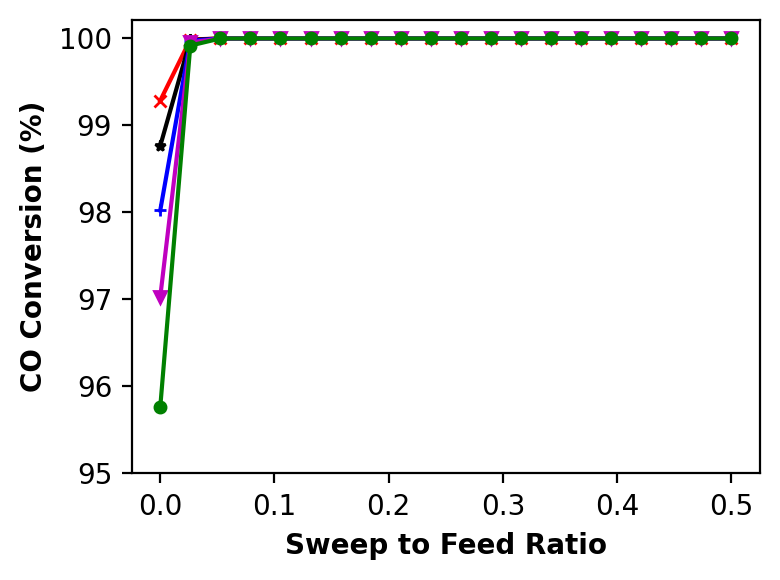

In [7]:
if sweep_sensitivity_study:
    # plot CO conversion vs sweep ratio
    plot_pd(data=conv_sweep,
            y_label="CO Conversion (%)",
            y_ticks=np.arange(95,101,1),
            show_legend=False,
            legend_col=3,
            legend_loc=(0.5, 1.0),
            save_fig=savefig)
#             txt="GHSV=3,000 hr$^{-1}$, Feed Pressure = 200 psig", 
#             txt_loc=[0.05,93],

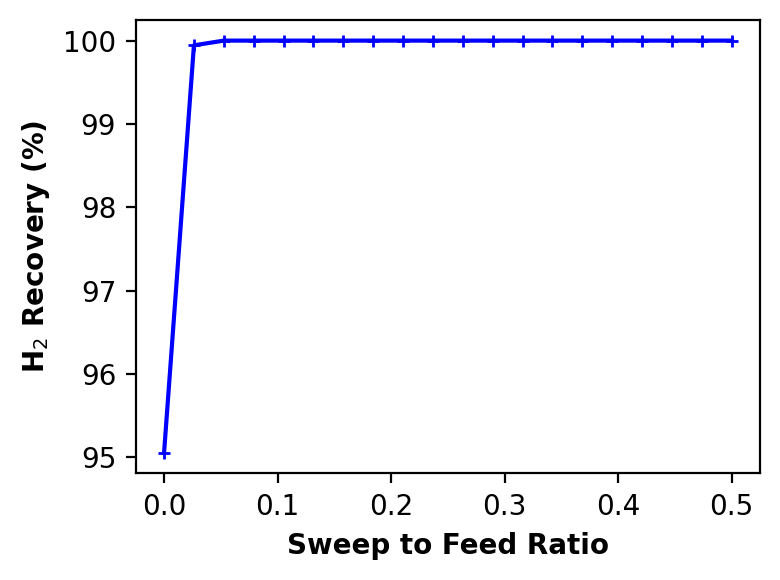

In [8]:
if sweep_sensitivity_study:
    # plot recovery vs sweep ratio
    plot_pd(data=rec_sweep,
            column='724K',
            line_styles = ["b+-"],
            y_label="H$_{2}$ Recovery (%)",
             y_ticks=np.arange(95,101,1),
            show_legend=False,
            legend_loc=(0.5, 1.0),
            save_fig=savefig)
#             txt="GHSV=3,000 hr$^{-1}$, T=450°C", 
#             txt_loc=[0.05,90.5],   line_styles = ["b+-"],

## **Feed pressure sensitivity**

In [9]:
pressure_sensitivity_study = True
Equilibrium_temp = 724 # K
# Equilibrium_temp= data['temp_reactor']

In [10]:
if pressure_sensitivity_study:
    
    # evaluate plug flow reactor (PFR) conversion of CO and print
    # create and solve model
    m = create_model(
        temp_retentate=Equilibrium_temp,
        feed_pressure=data['feed_pressure'],
        CO_comp_feed=data['CO_comp_feed'],
        H2O_comp_feed=data['H2O_comp_feed'],
        CO2_comp_feed=data['CO2_comp_feed'],
        H2_comp_feed=data['H2_comp_feed'],
        CH4_comp_feed=data['CH4_comp_feed'],
        N2_comp_feed=data['N2_comp_feed'],
        feed_flow=data['feed_flow'],
        pressure_drop_retentate=data['pressure_drop_retentate'],
        sweep_pressure=data['sweep_pressure'],
        pre_exponent=data['pre_exponent'],
        E_R=data['E_R'],
        pressure_exponent=data['pressure_exponent'],
        vol_reactor=data['vol_reactor'],
        area_membrane=data['area_membrane'],
        rho_catalyst=data['rho_catalyst'],
        num_elements=20,
        discretize_temperature=False,
        with_reaction=True,
        no_permeation=True,
        max_h2=False
    )

    m.T.fix(Equilibrium_temp)
    # deactivate reaction
    toggle_reaction_off(m)
    # define solver
    model_solver = pyo.SolverFactory("ipopt")
    # solve model without reaction
    results = model_solver.solve(m, tee=True)
    # resolve model
    results = model_solver.solve(m, tee=True)
    # toggle reaction on
    toggle_reaction_on(m)
    # initialize reaction rate
    init_reaction_rate(m)
    # solve full model
    results = model_solver.solve(m, tee=True)
    
    flow_factor = pyo.value(m.total_feed)

    PFR_conversion =  100 * (1- pyo.value(m.flow_retentate[pyo.value(m.ELEMENTS.last()), "CO"])*flow_factor
                / pyo.value(m.flow_feed["CO"]))
    print('PFR conversion =',PFR_conversion,'%')

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

PFR conversion = 70.70181998195224 %


In [11]:
if pressure_sensitivity_study:
    
    # constants
    Pco = data['CO_comp_feed']
    Ph2o = data['H2O_comp_feed']
    Pco2 = data['CO2_comp_feed']
    Ph2 = data['H2_comp_feed']
    
    Keq = 1.2E-1 * np.exp(4639/Equilibrium_temp)
    
    z = symbols('z')
    
    equilibrium_expression = Eq((((Pco2 + z)*(Ph2 + z))/((Pco - z)*(Ph2o - z))),Keq)
    
    possible_solutions = solve(equilibrium_expression,z)
    
    print(possible_solutions)
    
    conv1 = possible_solutions[0]/Pco
    conv2 = possible_solutions[1]/Pco
    
    print('possible eq conversions are',conv1, conv2)

[0.108848998850559, 0.431518385282153]
possible eq conversions are 0.959022016304485 3.80192409940223


In [12]:
# membrane reactor
if pressure_sensitivity_study:
    
    # evaluate plug flow reactor (PFR) conversion of CO and print
    # create and solve model
    m = create_model(
        temp_retentate=Equilibrium_temp,
        feed_pressure=data['feed_pressure'],
        CO_comp_feed=data['CO_comp_feed'],
        H2O_comp_feed=data['H2O_comp_feed'],
        CO2_comp_feed=data['CO2_comp_feed'],
        H2_comp_feed=data['H2_comp_feed'],
        CH4_comp_feed=data['CH4_comp_feed'],
        N2_comp_feed=data['N2_comp_feed'],
        feed_flow=data['feed_flow'],
        pressure_drop_retentate=data['pressure_drop_retentate'],
        sweep_pressure=data['sweep_pressure'],
        pre_exponent=data['pre_exponent'],
        E_R=data['E_R'],
        pressure_exponent=data['pressure_exponent'],
        vol_reactor=data['vol_reactor'],
        area_membrane=data['area_membrane'],
        rho_catalyst=data['rho_catalyst'],
        num_elements=20,
        discretize_temperature=False,
        with_reaction=True,
        no_permeation=False,
        max_h2=False
    )

    # deactivate reaction
    toggle_reaction_off(m)
    # define solver
    model_solver = pyo.SolverFactory("ipopt")
    # solve model without reaction
    results = model_solver.solve(m, tee=True)
    # resolve model
    results = model_solver.solve(m, tee=True)
    # toggle reaction on
    toggle_reaction_on(m)
    # initialize reaction rate
    init_reaction_rate(m)
    # solve full model
    results = model_solver.solve(m, tee=True)
    
    flow_factor = pyo.value(m.total_feed)

    MR_conversion =  100 * (1- pyo.value(m.flow_retentate[pyo.value(m.ELEMENTS.last()), "CO"])*flow_factor
                / pyo.value(m.flow_feed["CO"]))
    print('Membrane reactor conversion =',MR_conversion,'%')

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

  76 -0.0000000e+00 1.61e-05 9.31e+06  -1.0 6.16e+01    -  1.00e+00 3.25e-03h  9
  77 -0.0000000e+00 9.34e-04 9.22e+05  -1.0 2.47e+01    -  1.85e-01 1.00e+00w  1
  78 -0.0000000e+00 2.74e-03 8.52e+05  -1.0 7.47e+02    -  5.56e-02 4.94e-02w  1
  79 -0.0000000e+00 2.71e-03 7.74e+06  -1.0 1.33e+02    -  1.00e+00 1.42e-02w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 -0.0000000e+00 1.61e-05 9.17e+06  -1.0 4.71e+01    -  1.85e-01 1.56e-02h  6
  81 -0.0000000e+00 1.61e-05 9.15e+06  -1.0 6.01e+01    -  1.00e+00 3.31e-03h  9
  82 -0.0000000e+00 1.61e-05 9.01e+06  -1.0 2.80e+01    -  1.85e-01 1.56e-02h  7
  83 -0.0000000e+00 1.61e-05 8.99e+06  -1.0 5.87e+01    -  1.00e+00 3.36e-03h  9
  84 -0.0000000e+00 1.60e-05 8.93e+06  -1.0 3.07e+01    -  1.89e-01 7.81e-03h  8
  85 -0.0000000e+00 1.60e-05 9.10e+06  -1.0 5.73e+01    -  1.00e+00 3.43e-03h  9
  86 -0.0000000e+00 1.60e-05 9.12e+06  -1.0 3.23e+01    -  1.92e-01 7.81e-03h  8
  87 -0.0000000e+00 1.60e-05

 173 -0.0000000e+00 1.47e-05 1.19e+07  -1.0 4.17e+01    -  4.51e-01 3.91e-03h  9
 174 -0.0000000e+00 1.47e-05 1.18e+07  -1.0 4.51e+01    -  1.00e+00 3.82e-03h  9
 175 -0.0000000e+00 1.47e-05 1.16e+07  -1.0 4.17e+01    -  4.59e-01 3.91e-03h  9
 176 -0.0000000e+00 1.47e-05 1.15e+07  -1.0 4.50e+01    -  1.00e+00 3.82e-03h  9
 177 -0.0000000e+00 1.46e-05 1.14e+07  -1.0 4.16e+01    -  4.68e-01 3.91e-03h  9
 178 -0.0000000e+00 1.46e-05 1.12e+07  -1.0 4.49e+01    -  1.00e+00 3.83e-03h  9
 179 -0.0000000e+00 1.46e-05 1.11e+07  -1.0 4.16e+01    -  4.76e-01 3.91e-03h  9
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 -0.0000000e+00 1.46e-05 1.09e+07  -1.0 4.47e+01    -  1.00e+00 3.83e-03h  9
 181 -0.0000000e+00 2.62e-03 4.18e+05  -1.0 4.15e+01    -  4.85e-01 1.00e+00w  1
 182 -0.0000000e+00 1.94e-03 1.70e+06  -1.0 6.09e+01    -  5.24e-01 3.38e-01w  1
 183 -0.0000000e+00 1.88e-03 3.41e+06  -1.0 6.02e+01    -  1.00e+00 3.07e-02w  1
 184 -0.0000000e+00 1.45e-05

  24 -0.0000000e+00 5.67e-11 1.69e+06  -3.8 1.02e+00    -  1.00e+00 2.44e-04h 13
  25 -0.0000000e+00 5.67e-11 1.69e+06  -3.8 1.06e+00    -  1.00e+00 2.44e-04h 13
  26 -0.0000000e+00 5.67e-11 1.69e+06  -3.8 1.09e+00    -  1.00e+00 2.44e-04h 13
  27 -0.0000000e+00 5.67e-11 1.69e+06  -3.8 1.10e+00    -  1.00e+00 2.44e-04h 13
  28 -0.0000000e+00 5.67e-11 1.69e+06  -3.8 1.12e+00    -  1.00e+00 2.44e-04h 13
  29 -0.0000000e+00 1.79e-07 2.78e+03  -3.8 1.13e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 -0.0000000e+00 2.29e-10 6.66e+02  -8.6 3.96e-02    -  9.57e-01 1.00e+00h  1
  31 -0.0000000e+00 2.78e-16 1.95e+00  -8.6 3.64e-05  -4.0 9.99e-01 1.00e+00h  1
  32 -0.0000000e+00 2.78e-16 2.04e+00  -9.0 2.92e-18  17.8 1.00e+00 1.00e+00   0
  33 -0.0000000e+00 1.01e-07 5.91e-01  -9.0 8.45e-01    -  1.00e+00 1.00e+00h  1
MA27BD returned iflag=-4 and requires more memory.
 Increase liw from 31335 to 62670 and la from 47480 to 101

In [13]:
if pressure_sensitivity_study:
    equilibrium_conv = conv1*100

In [14]:
if pressure_sensitivity_study:
    # pressure sensitivity industry units
    conv, recov = pressure_sensitivity(data=data,
                                         pressure_list=np.arange(3500,400,-100),
                                        temp_list=[624, 674, 724, 774],
                                        with_reaction=True,
                                        industry_units=False,
                                        save_data=save_data,
                                       equilibrium_conversion = equilibrium_conv,
                                       PFR_conversion = PFR_conversion,
                                      verbose=LOUD) # , 824

Beging initialization
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        co


T =  624 P =  3500
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        comp

solver status:  optimal

T =  624 P =  3300
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   4r-0.0000000e+00 4.13e+04 1.00e+03   4.6 0.00e+00    -  0.00e+00 3.92e-07R  5
   5r-0.0000000e+00 4.11e+04 1.92e+03   4.6 7.79e+05    -  3.38e-04 2.10e-04f  1
   6r-0.0000000e+00 2.22e+04 7.65e+03   2.5 7.79e+05    -  2.21e-01 5.23e-02f  1
   7r-0.0000000e+00 2.21e+04 1.45e+04   2.5 8.15e+04    -  1.00e+00 5.01e-03f  1
   8r-0.0000000e+00 4.50e+03 1.06e+04   2.5 4.10e+01    -  1.00e+00 9.75e-01f  1
   9r-0.0000000e+00 1.12e+03 1.58e+03   1.8 6.13e+00    -  7.82e-01 8.45e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 4.69e+02 1.10e+04   1.1 9.30e-01    -  5.52e-01 8.08e-01f  1
  11r-0.0000000e+00 1.82e+02 2.50e+03   1.1 2.63e-01    -  7.98e-01 7.55e-01f  1
  12r-0.0000000e+00 7.22e+01 7.22e+02   1.1 3.75e-01    -  1.00e+00 8.29e-01f  1
  13r-0.0000000e+00 4.38e+01 7.98e+02   1.1 1.15e-01    -  1.00e+00 1.00e+00f  1
  14r-0.0000000e+00 4.42e+00 2.72e+01   1.1 3.12e-02    -  1.00e+00 1.00e+00f  1
  15r-0.0000000e+00 3.07e+01

solver status:  optimal

T =  624 P =  3000
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   4r-0.0000000e+00 4.30e+04 1.00e+03   4.6 0.00e+00    -  0.00e+00 3.38e-07R  5
   5r-0.0000000e+00 4.29e+04 1.86e+03   4.6 6.94e+05    -  3.28e-04 2.03e-04f  1
   6r-0.0000000e+00 1.71e+04 4.46e+03   2.5 6.94e+05    -  1.58e-01 6.12e-02f  1
   7r-0.0000000e+00 1.70e+04 5.87e+03   2.5 1.23e+05    -  1.11e-01 3.46e-03f  1
   8r-0.0000000e+00 7.13e+03 1.08e+04   2.5 9.50e+00   2.0 1.00e+00 6.73e-01f  1
   9r-0.0000000e+00 5.50e+03 1.01e+04   1.8 8.56e+02    -  8.09e-01 1.64e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 5.81e+02 1.65e+03   1.8 1.24e+02    -  7.85e-01 8.00e-01f  1
  11r-0.0000000e+00 2.32e+02 2.73e+03   1.1 8.52e+00    -  6.78e-01 8.07e-01f  1
  12r-0.0000000e+00 9.07e+01 1.62e+03   1.1 1.42e+00    -  8.66e-01 8.59e-01f  1
  13r-0.0000000e+00 4.00e+01 6.50e+02   1.1 4.19e-01    -  1.00e+00 8.37e-01f  1
  14r-0.0000000e+00 3.26e+01 1.08e+03   0.4 2.04e-01    -  7.94e-01 6.78e-01f  1
  15r-0.0000000e+00 3.63e+01


Number of Iterations....: 47

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   3.3918352443706648e-09    5.3019256111917334e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.3918352443706648e-09    5.3019256111917334e-09


Number of objective function evaluations             = 53
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 53
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 49
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 47
Total CPU secs in IPOPT (w/o function evaluations)   =      0.188
Total CPU secs in NLP function evaluations

solver status:  optimal

T =  624 P =  2600
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   4r-0.0000000e+00 4.57e+04 1.00e+03   4.7 0.00e+00    -  0.00e+00 2.70e-07R  5
   5r-0.0000000e+00 4.56e+04 1.96e+03   4.7 5.84e+05    -  3.37e-04 1.93e-04f  1
   6r-0.0000000e+00 1.19e+04 3.87e+03   2.6 5.84e+05    -  1.67e-01 6.33e-02f  1
   7r-0.0000000e+00 1.19e+04 1.41e+04   2.6 2.01e+06    -  1.00e+00 4.27e-03f  1
   8r-0.0000000e+00 4.24e+03 7.42e+03   2.6 4.21e+02    -  6.84e-01 6.48e-01f  1
   9r-0.0000000e+00 1.39e+03 5.29e+02   1.9 1.27e+02    -  8.75e-01 8.55e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 4.62e+02 9.16e+02   1.2 4.34e+01    -  5.73e-01 8.98e-01f  1
  11r-0.0000000e+00 1.58e+02 3.24e+03   1.2 5.12e+00    -  7.30e-01 8.20e-01f  1
  12r-0.0000000e+00 4.96e+01 1.70e+03   1.2 9.62e-01    -  9.68e-01 9.94e-01f  1
  13r-0.0000000e+00 1.55e+01 2.07e+03   1.2 2.01e-01    -  1.00e+00 1.00e+00f  1
  14r-0.0000000e+00 5.50e+00 9.25e+01   1.2 5.77e-02    -  1.00e+00 1.00e+00f  1
  15r-0.0000000e+00 2.04e+01

solver status:  optimal

T =  624 P =  2300
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   2 -0.0000000e+00 4.82e+04 1.29e+03  -1.0 4.97e+04    -  9.84e-01 3.16e-02h  1
   3 -0.0000000e+00 4.82e+04 3.80e+06  -1.0 4.82e+04    -  9.84e-01 3.54e-04h  1
   4r-0.0000000e+00 4.82e+04 1.00e+03   4.7 0.00e+00    -  0.00e+00 4.43e-07R  4
   5r-0.0000000e+00 4.81e+04 2.27e+03   4.7 5.04e+05    -  3.69e-04 1.85e-04f  1
   6r-0.0000000e+00 1.40e+04 3.23e+03   2.6 5.04e+05    -  1.57e-01 6.77e-02f  1
   7r-0.0000000e+00 8.69e+03 1.16e+04   2.6 2.81e+06    -  1.00e+00 4.94e-03f  1
   8r-0.0000000e+00 3.93e+03 8.24e+03   2.6 8.06e+02    -  6.53e-01 5.01e-01f  1
   9r-0.0000000e+00 8.72e+02 2.88e+02   1.9 1.63e+02    -  1.00e+00 8.50e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 2.84e+02 1.09e+03   1.9 8.53e+01    -  1.00e+00 9.61e-01f  1
  11r-0.0000000e+00 1.04e+02 2.98e+03   1.2 3.62e+00    -  7.44e-01 8.61e-01f  1
  12r-0.0000000e+00 3.89e+01 1.50e+03   1.2 5.00e-01    -  1.00e+00 1.00e+00f  1
  13r-0.0000000e+00 1.15e+01


Number of Iterations....: 45

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   3.5658593133346247e-09    3.5658593133346247e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5658593133346247e-09    3.5658593133346247e-09


Number of objective function evaluations             = 50
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 50
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 47
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 45
Total CPU secs in IPOPT (w/o function evaluations)   =      0.186
Total CPU secs in NLP function evaluations

solver status:  optimal

T =  624 P =  1900
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   3 -0.0000000e+00 5.20e+04 5.59e+06  -1.0 5.21e+04    -  9.84e-01 2.60e-04h  1
   4r-0.0000000e+00 5.20e+04 1.00e+03   4.7 0.00e+00    -  0.00e+00 3.26e-07R  4
   5r-0.0000000e+00 5.20e+04 3.19e+03   4.7 4.00e+05    -  4.65e-04 1.74e-04f  1
   6r-0.0000000e+00 2.01e+04 4.22e+03   2.6 4.00e+05    -  1.76e-01 7.97e-02f  1
   7r-0.0000000e+00 5.59e+03 1.36e+04   2.6 3.00e+06    -  1.00e+00 6.64e-03f  1
   8r-0.0000000e+00 3.41e+03 1.46e+04   2.6 1.49e+03    -  9.42e-01 3.26e-01f  1
   9r-0.0000000e+00 7.12e+02 6.33e+02   1.9 2.06e+02    -  1.00e+00 9.52e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 1.87e+02 1.40e+03   1.2 3.02e+01    -  6.00e-01 9.05e-01f  1
  11r-0.0000000e+00 7.24e+01 3.19e+03   1.2 3.05e+00    -  7.45e-01 8.90e-01f  1
  12r-0.0000000e+00 2.74e+01 4.23e+03   1.2 3.52e-01    -  1.00e+00 1.00e+00f  1
  13r-0.0000000e+00 6.62e+00 7.06e+02   1.2 6.12e-02    -  1.00e+00 1.00e+00f  1
  14r-0.0000000e+00 1.19e+01

solver status:  optimal

T =  624 P =  1600
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   4r-0.0000000e+00 5.57e+04 1.00e+03   4.7 0.00e+00    -  0.00e+00 4.92e-07R  3
   5r-0.0000000e+00 5.56e+04 4.12e+03   4.7 3.25e+05    -  5.62e-04 1.64e-04f  1
   6r-0.0000000e+00 3.35e+04 1.04e+04   2.6 3.25e+05    -  2.81e-01 6.83e-02f  1
   7r-0.0000000e+00 4.49e+03 2.39e+04   2.6 2.88e+06    -  1.00e+00 1.15e-02f  1
   8r-0.0000000e+00 3.58e+03 2.35e+04   2.6 2.88e+03    -  1.00e+00 2.05e-01f  1
   9r-0.0000000e+00 5.01e+02 1.26e+03   1.9 2.04e+02    -  1.00e+00 9.48e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 1.63e+02 1.17e+03   1.3 1.08e+01    -  5.85e-01 9.18e-01f  1
  11r-0.0000000e+00 6.09e+01 3.54e+03   1.3 1.18e+00    -  7.55e-01 8.78e-01f  1
  12r-0.0000000e+00 2.25e+01 4.33e+03   1.3 2.56e-01    -  1.00e+00 1.00e+00f  1
  13r-0.0000000e+00 5.00e+00 8.33e+02   1.3 7.26e-02    -  1.00e+00 1.00e+00f  1
  14r-0.0000000e+00 7.96e+00 1.17e+03   0.6 1.85e-01    -  8.49e-01 8.63e-01f  1
  15r-0.0000000e+00 9.14e+00

solver status:  optimal

T =  624 P =  1300
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   2 -0.0000000e+00 6.02e+04 1.84e+03  -1.0 6.10e+04    -  9.83e-01 1.35e-02h  1
   3 -0.0000000e+00 6.02e+04 1.31e+07  -1.0 6.02e+04    -  9.83e-01 1.40e-04h  1
   4r-0.0000000e+00 6.02e+04 1.00e+03   4.8 0.00e+00    -  0.00e+00 3.54e-07R  3
   5r-0.0000000e+00 6.01e+04 4.54e+03   4.8 2.53e+05    -  6.02e-04 1.52e-04f  1
   6r-0.0000000e+00 3.94e+04 1.64e+04   2.7 2.53e+05    -  5.68e-01 8.18e-02f  1
   7r-0.0000000e+00 2.69e+03 1.60e+04   2.7 2.34e+06    -  9.05e-01 1.67e-02f  1
   8r-0.0000000e+00 2.27e+03 2.14e+04   2.7 3.93e+03    -  1.00e+00 1.54e-01f  1
   9r-0.0000000e+00 2.75e+02 2.96e+03   2.0 1.40e+02    -  8.94e-01 9.55e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 9.30e+01 1.09e+03   1.3 6.75e+00    -  6.24e-01 9.07e-01f  1
  11r-0.0000000e+00 3.73e+01 4.32e+03   1.3 1.04e+00    -  7.46e-01 8.76e-01f  1
  12r-0.0000000e+00 1.38e+01 4.26e+03   1.3 2.29e-01    -  1.00e+00 1.00e+00f  1
  13r-0.0000000e+00 3.34e+00

solver status:  optimal

T =  624 P =  1000
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   4r-0.0000000e+00 6.59e+04 1.00e+03   4.8 0.00e+00    -  0.00e+00 4.60e-07R  2
   5r-0.0000000e+00 6.59e+04 5.19e+03   4.8 1.85e+05    -  6.66e-04 1.40e-04f  1
   6r-0.0000000e+00 5.29e+04 3.51e+04   2.7 1.85e+05    -  1.00e+00 7.02e-02f  1
   7r-0.0000000e+00 1.39e+03 1.97e+04   2.7 1.85e+06    -  6.85e-01 2.83e-02f  1
   8r-0.0000000e+00 1.29e+03 2.19e+04   2.7 9.69e+03    -  1.00e+00 7.04e-02f  1
   9r-0.0000000e+00 3.59e+02 1.13e+04   2.7 1.03e+02    -  1.00e+00 9.82e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 8.91e+01 1.71e+03   2.0 5.85e+00    -  8.68e-01 8.66e-01f  1
  11r-0.0000000e+00 3.63e+01 4.90e+03   1.3 8.84e-01    -  6.72e-01 8.41e-01f  1
  12r-0.0000000e+00 1.21e+01 3.06e+03   1.3 2.11e-01    -  8.21e-01 8.86e-01f  1
  13r-0.0000000e+00 2.92e+00 7.99e+02   1.3 1.72e-01    -  1.00e+00 1.00e+00f  1
  14r-0.0000000e+00 2.74e+00 1.09e+03   0.6 2.32e-01    -  8.92e-01 8.70e-01f  1
  15r-0.0000000e+00 3.40e+00

solver status:  optimal

T =  624 P =  700
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

   1 -0.0000000e+00 7.39e+04 9.66e+00  -1.0 1.00e+05    -  9.79e-01 2.61e-01h  1
   2 -0.0000000e+00 7.35e+04 3.53e+03  -1.0 7.39e+04    -  9.82e-01 5.11e-03h  1
   3 -0.0000000e+00 7.35e+04 6.68e+07  -1.0 7.35e+04    -  9.82e-01 5.18e-05h  1
   4r-0.0000000e+00 7.35e+04 1.00e+03   4.9 0.00e+00    -  0.00e+00 2.59e-07R  2
   5r-0.0000000e+00 7.35e+04 8.21e+03   4.9 1.22e+05    -  9.88e-04 1.30e-04f  1
   6r-0.0000000e+00 6.71e+04 2.01e+04   2.8 1.22e+05    -  3.89e-01 5.20e-02f  1
   7r-0.0000000e+00 6.39e+02 1.05e+04   2.8 1.31e+06    -  8.92e-01 5.06e-02f  1
   8r-0.0000000e+00 4.90e+02 2.48e+04   2.8 3.03e+04    -  1.00e+00 2.37e-02f  1
   9r-0.0000000e+00 1.59e+02 1.23e+04   2.8 6.69e+01    -  1.00e+00 9.79e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 8.06e+01 4.94e+03   2.1 2.53e+01    -  7.19e-01 8.19e-01f  1
  11r-0.0000000e+00 2.74e+01 3.17e+03   1.4 4.19e+00    -  6.78e-01 8.64e-01f  1
  12r-0.0000000e+00 9.36e+00

solver status:  optimal
Beging initialization
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-sca


T =  674 P =  3500
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        comp


Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   5.9129690264360585e-09    3.7924679987977897e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.9129690264360585e-09    3.7924679987977897e-08


Number of objective function evaluations             = 8
Number of objective gradient evaluations             = 8
Number of equality constraint evaluations            = 8
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 8
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 7
Total CPU secs in IPOPT (w/o function evaluations)   =      0.040
Total CPU secs in NLP function evaluations     

solver status:  optimal

T =  674 P =  3000
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   3 -0.0000000e+00 1.27e+02 7.67e+02  -1.0 7.10e+02    -  5.67e-01 8.21e-01h  1
   4 -0.0000000e+00 1.24e+00 4.43e+04  -1.0 1.27e+02    -  9.90e-01 9.90e-01h  1
   5 -0.0000000e+00 7.87e-03 1.46e+04  -1.0 1.24e+00    -  9.96e-01 9.94e-01h  1
   6 -0.0000000e+00 7.99e-08 9.60e+03  -1.0 7.87e-03    -  1.00e+00 1.00e+00h  1
   7 -0.0000000e+00 1.69e-08 2.33e+03  -3.8 6.13e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   3.9895694401674965e-09    1.6883203089234023e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.9895694401674965e-09    1.6883203089234023e-08


Number of objective function evaluations             = 8
Number of objective gradient evaluations          

solver status:  optimal

T =  674 P =  2500
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   7 -0.0000000e+00 7.03e-09 8.65e+02  -2.5 3.99e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   2.4315667394010187e-09    7.0322528462017902e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.4315667394010187e-09    7.0322528462017902e-09


Number of objective function evaluations             = 8
Number of objective gradient evaluations             = 8
Number of equality constraint evaluations            = 8
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 8
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 7
Total CPU secs in IPOPT (w/o fun

solver status:  optimal

T =  674 P =  2000
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

solver status:  optimal

T =  674 P =  1700
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

solver status:  optimal

T =  674 P =  1400
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   4 -0.0000000e+00 7.84e-02 1.13e+03  -1.0 9.27e+00    -  9.90e-01 9.92e-01h  1
   5 -0.0000000e+00 5.63e-04 2.84e+03  -1.7 7.84e-02    -  9.91e-01 9.93e-01h  1
   6 -0.0000000e+00 8.29e-07 1.69e+03  -2.5 5.63e-04    -  1.00e+00 9.99e-01h  1
   7 -0.0000000e+00 9.16e-16 3.59e+01  -2.5 8.29e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   1.1102230246251565e-16    9.1593399531575415e-16
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.1102230246251565e-16    9.1593399531575415e-16


Number of objective function evaluations             = 8
Number of objective gradient evaluations             = 8
Number of equality constraint evaluations            = 8
Number of inequal

solver status:  optimal

T =  674 P =  900
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

solver status:  optimal

T =  674 P =  600
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

   3r-0.0000000e+00 3.37e+06 9.99e+02   6.5 0.00e+00    -  0.00e+00 4.90e-07R  3
   4r-0.0000000e+00 3.37e+06 4.45e+06   6.5 2.42e+05    -  1.38e-02 5.59e-06f  1
   5r-0.0000000e+00 3.35e+06 8.53e+05   1.6 3.11e+04    -  8.09e-01 4.80e-01f  1
   6r-0.0000000e+00 2.92e+06 7.55e+05   1.6 1.03e+06    -  1.15e-01 4.20e-01f  1
   7r-0.0000000e+00 2.64e+06 3.94e+05   1.6 5.84e+05    -  4.79e-01 4.84e-01f  1
   8r-0.0000000e+00 2.42e+06 1.00e+05   1.6 3.04e+05    -  7.45e-01 7.37e-01f  1
   9r-0.0000000e+00 2.36e+06 3.88e+04   1.6 8.23e+04    -  6.16e-01 8.23e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r-0.0000000e+00 2.35e+06 7.11e+03   1.6 1.52e+04    -  8.18e-01 9.53e-01f  1
  11r-0.0000000e+00 2.35e+06 1.78e+03   1.6 8.54e+02    -  7.61e-01 4.96e-01f  1
  12r-0.0000000e+00 2.35e+06 2.14e+03   1.6 4.36e+02    -  4.74e-01 1.66e-01f  1
  13r-0.0000000e+00 2.35e+06 6.05e+02   1.6 3.64e+02    -  6.36e-01 8.35e-01f  1
  14r-0.0000000e+00 2.35e+06


T =  724 P =  3500
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        comp

   2 -0.0000000e+00 5.75e+02 3.97e+01  -1.0 9.53e+03    -  9.89e-01 9.40e-01h  1
   3 -0.0000000e+00 2.86e+02 4.82e+03  -1.0 5.75e+02    -  9.60e-01 5.03e-01h  1
   4 -0.0000000e+00 2.85e+00 6.76e+05  -1.0 2.86e+02    -  7.33e-03 9.90e-01h  1
   5 -0.0000000e+00 1.84e-02 8.28e+04  -1.0 2.85e+00    -  9.91e-01 9.94e-01h  1
   6 -0.0000000e+00 3.24e-07 2.65e+04  -1.0 1.84e-02    -  1.00e+00 1.00e+00h  1
   7 -0.0000000e+00 7.05e-08 4.67e+03  -2.5 8.51e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   6.4038370062543854e-09    7.0462664574005098e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.4038370062543854e-09    7.0462664574005098e-08


Number of objective functi

solver status:  optimal

T =  724 P =  3000
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

solver status:  optimal

T =  724 P =  2700
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   6 -0.0000000e+00 6.86e-08 2.68e+03  -2.5 8.58e-04    -  1.00e+00 1.00e+00h  1
   7 -0.0000000e+00 1.32e-08 1.74e+03  -2.5 3.84e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   2.4227346886672826e-09    1.3239828298821990e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.4227346886672826e-09    1.3239828298821990e-08


Number of objective function evaluations             = 8
Number of objective gradient evaluations             = 8
Number of equality constraint evaluations            = 8
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 8
Number of inequality constraint Jacobian evaluations = 0
Number o

solver status:  optimal

T =  724 P =  2200
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

solver status:  optimal

T =  724 P =  1900
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

solver status:  optimal

T =  724 P =  1600
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   1 -0.0000000e+00 1.45e+03 1.47e+01  -1.0 1.00e+05    -  9.78e-01 9.86e-01h  1
   2 -0.0000000e+00 2.71e+01 3.40e+02  -1.0 1.45e+03    -  9.90e-01 9.81e-01h  1
   3 -0.0000000e+00 2.39e-01 1.21e+03  -1.0 2.71e+01    -  9.90e-01 9.91e-01h  1
   4 -0.0000000e+00 1.18e-03 3.07e+03  -1.0 2.39e-01    -  9.95e-01 9.95e-01h  1
   5 -0.0000000e+00 6.17e-09 9.58e+02  -2.5 1.18e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   5.1020223553371923e-09    6.1734401570791297e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.1020223553371923e-09    6.1734401570791297e-09


Number of objective function evaluations             = 6
Number of objective gradient evaluations          

solver status:  optimal

T =  724 P =  1100
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

solver status:  optimal

T =  724 P =  800
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

   1 -0.0000000e+00 2.70e+03 2.68e+01  -1.0 1.00e+05    -  9.79e-01 9.73e-01h  1
   2 -0.0000000e+00 9.91e+01 3.84e+02  -1.0 2.70e+03    -  5.94e-01 9.63e-01h  1
   3 -0.0000000e+00 9.07e-01 1.78e+02  -1.0 9.91e+01    -  9.90e-01 9.91e-01h  1
   4 -0.0000000e+00 8.31e-03 2.87e+03  -1.0 9.07e-01    -  9.90e-01 9.91e-01h  1
   5 -0.0000000e+00 1.29e-13 8.94e+03  -2.5 8.31e-03    -  9.98e-01 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   9.5960999563216021e-14    1.2898189460930354e-13
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.5960999563216021e-14    1.2898189460930354e-13


Number of objective function evaluations             = 6
Number of objective gradient evaluations          

End initialization

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        comp

   5 -0.0000000e+00 3.78e-01 7.10e+05  -1.0 4.02e+01    -  9.94e-01 9.91e-01h  1
   6 -0.0000000e+00 1.78e-03 1.67e+05  -1.0 3.78e-01    -  1.00e+00 9.95e-01h  1
   7 -0.0000000e+00 1.64e-07 4.00e+04  -1.0 1.78e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   9.2591465296487397e-09    1.6447963790703550e-07
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.2591465296487397e-09    1.6447963790703550e-07


Number of objective function evaluations             = 8
Number of objective gradient evaluations             = 8
Number of equality constraint evaluations            = 8
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

solver status:  optimal

T =  774 P =  3100
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   1 -0.0000000e+00 1.54e+03 9.52e+00  -1.0 1.00e+05    -  9.76e-01 9.85e-01h  1
   2 -0.0000000e+00 4.92e+02 3.38e+02  -1.0 1.54e+03    -  9.90e-01 6.80e-01h  1
   3 -0.0000000e+00 1.39e+02 2.13e+04  -1.0 4.92e+02    -  9.90e-01 7.17e-01h  1
   4 -0.0000000e+00 1.42e+00 1.38e+05  -1.0 1.39e+02    -  2.89e-02 9.90e-01h  1
   5 -0.0000000e+00 1.00e-02 3.35e+04  -1.0 1.42e+00    -  9.94e-01 9.93e-01h  1
   6 -0.0000000e+00 2.58e-07 8.02e+03  -1.0 1.00e-02    -  1.00e+00 1.00e+00h  1
   7 -0.0000000e+00 5.24e-08 1.78e+03  -3.8 6.14e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   4.2774352951559317e-09    5.2407491775782106e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......

solver status:  optimal

T =  774 P =  2600
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   2 -0.0000000e+00 3.52e+02 3.49e+02  -1.0 1.52e+03    -  9.90e-01 7.68e-01h  1
   3 -0.0000000e+00 3.84e+00 6.86e+03  -1.0 3.52e+02    -  9.90e-01 9.89e-01h  1
   4 -0.0000000e+00 3.09e-02 4.90e+03  -1.0 3.84e+00    -  9.94e-01 9.92e-01h  1
   5 -0.0000000e+00 4.08e-07 5.78e+03  -1.0 3.09e-02    -  1.00e+00 1.00e+00h  1
   6 -0.0000000e+00 8.32e-08 1.67e+03  -2.5 7.77e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   8.5651862016937225e-09    8.3161109574659932e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   8.5651862016937225e-09    8.3161109574659932e-08


Number of objective function evaluations             = 7
Number of objective gradient evaluations          

solver status:  optimal

T =  774 P =  2100
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   3 -0.0000000e+00 1.67e-01 5.50e+03  -1.0 1.86e+01    -  9.90e-01 9.91e-01h  1
   4 -0.0000000e+00 6.80e-04 6.29e+03  -1.0 1.67e-01    -  9.94e-01 9.96e-01h  1
   5 -0.0000000e+00 9.30e-08 1.79e+03  -2.5 8.64e-04    -  1.00e+00 1.00e+00h  1
   6 -0.0000000e+00 1.46e-08 8.31e+02  -2.5 3.75e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   3.0425984217245295e-09    1.4628361116620452e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.0425984217245295e-09    1.4628361116620452e-08


Number of objective function evaluations             = 7
Number of objective gradient evaluations             = 7
Number of equality constraint evaluations            = 7
Number of inequal

solver status:  optimal

T =  774 P =  1600
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   1 -0.0000000e+00 1.00e+03 9.58e+00  -1.0 1.00e+05    -  9.78e-01 9.90e-01h  1
   2 -0.0000000e+00 1.64e+01 5.52e+02  -1.0 1.00e+03    -  9.90e-01 9.84e-01h  1
   3 -0.0000000e+00 1.47e-01 1.27e+03  -1.0 1.64e+01    -  9.90e-01 9.91e-01h  1
   4 -0.0000000e+00 4.10e-04 1.12e+04  -1.0 1.47e-01    -  9.95e-01 9.97e-01h  1
   5 -0.0000000e+00 1.77e-08 1.45e+03  -2.5 7.32e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   8.5764291745516310e-09    1.7682250026110260e-08
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   8.5764291745516310e-09    1.7682250026110260e-08


Number of objective function evaluations             = 6
Number of objective gradient evaluations          

solver status:  optimal

T =  774 P =  1100
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

   3 -0.0000000e+00 3.19e-01 5.98e+02  -1.0 3.71e+01    -  9.90e-01 9.91e-01h  1
   4 -0.0000000e+00 2.51e-03 1.18e+04  -1.0 3.19e-01    -  9.95e-01 9.92e-01h  1
   5 -0.0000000e+00 2.15e-05 2.19e+04  -1.7 2.51e-03    -  1.00e+00 9.91e-01h  1
   6 -0.0000000e+00 8.88e-16 1.54e+01  -2.5 2.15e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:  -0.0000000000000000e+00   -0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   2.2096463772364658e-16    8.8817841970012523e-16
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2096463772364658e-16    8.8817841970012523e-16


Number of objective function evaluations             = 7
Number of objective gradient evaluations             = 7
Number of equality constraint evaluations            = 7
Number of inequal

solver status:  optimal

T =  774 P =  600
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

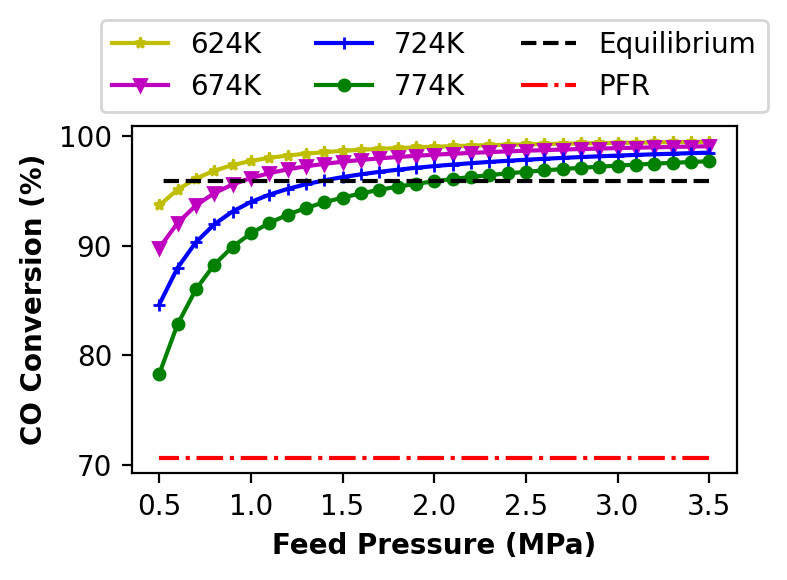

In [15]:
if pressure_sensitivity_study:
    plot_pd(data=conv,
        y_label="CO Conversion (%)",
        show_legend=True,
        legend_loc=(0.5, 1),
        legend_col=3,

        line_styles = ["y*-","mv-","b+-","go-","k--","r-."],
        save_fig=savefig)
#         txt="GHSV=3,000 hr$^{-1}$",
#         txt_loc=[1.5,50], 
#         y_ticks=np.arange(70,110,10),

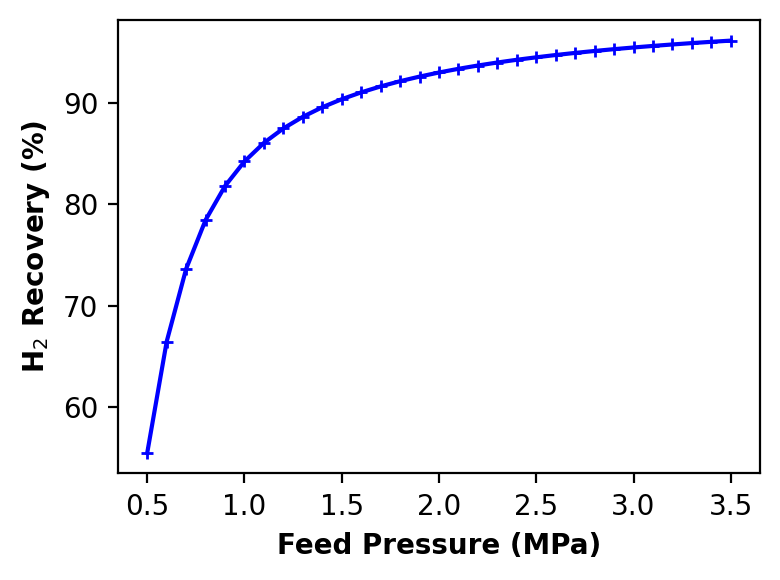

In [16]:
if pressure_sensitivity_study:
    # plot recovery
    plot_pd(data=recov,
            y_label="H$_{2}$ Recovery (%)",
            show_legend=False,
            legend_loc=(0.5, 1),
            legend_col=3,
            column='724K',
            line_styles = ["b+-"],
            x_ticks=np.arange(0.5,4,0.5),
            save_fig=savefig)
#             txt="GHSV=3,000 hr$^{-1}$",
#             txt_loc=[1.5,50], line_styles = ["b+-"],
#             y_ticks=np.arange(50,110,10),